In [1]:
import os
import glob
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_path = '/Users/shambokarar/Desktop/Personal Study/Portfolio Projects/Groceries-Image-Recognition/train'
test_path = '/Users/shambokarar/Desktop/Personal Study/Portfolio Projects/Groceries-Image-Recognition/test'
validation_path = '/Users/shambokarar/Desktop/Personal Study/Portfolio Projects/Groceries-Image-Recognition/validation'

In [3]:
# Function to count the number of images in each class
def count_images_per_class(folder_path):
    classes = os.listdir(folder_path)
    class_counts = {}

    for class_name in classes:
        class_folder = os.path.join(folder_path, class_name)
        if os.path.isdir(class_folder):
            class_count = len(glob.glob(os.path.join(class_folder, '*.jpg')))  
            class_counts[class_name] = class_count

    return class_counts

# Count images in training set
train_class_counts = count_images_per_class(train_path)
print("Training Set Class Distribution:")
print(train_class_counts)

# Count images in validation set
validation_class_counts = count_images_per_class(validation_path)
print("\nValidation Set Class Distribution:")
print(validation_class_counts)

# Count images in test set
test_class_counts = count_images_per_class(test_path)
print("\nTest Set Class Distribution:")
print(test_class_counts)

Training Set Class Distribution:
{'apple': 58, 'turnip': 85, 'chilli pepper': 76, 'raddish': 70, 'bell pepper': 78, 'pear': 76, 'sweetpotato': 69, 'pomegranate': 74, 'peas': 90, 'capsicum': 80, 'spinach': 87, 'lettuce': 87, 'kiwi': 82, 'lemon': 64, 'onion': 80, 'cauliflower': 71, 'potato': 66, 'jalepeno': 79, 'sweetcorn': 83, 'cucumber': 78, 'paprika': 74, 'watermelon': 79, 'mango': 77, 'cabbage': 84, 'grapes': 85, 'beetroot': 84, 'eggplant': 77, 'corn': 84, 'soy beans': 92, 'banana': 62, 'ginger': 64, 'garlic': 83, 'pineapple': 84, 'tomato': 84, 'orange': 61, 'carrot': 73}

Validation Set Class Distribution:
{'apple': 9, 'turnip': 10, 'chilli pepper': 7, 'raddish': 8, 'bell pepper': 9, 'pear': 10, 'sweetpotato': 10, 'pomegranate': 10, 'peas': 9, 'capsicum': 9, 'spinach': 10, 'lettuce': 9, 'kiwi': 10, 'lemon': 7, 'onion': 9, 'cauliflower': 9, 'potato': 9, 'jalepeno': 9, 'sweetcorn': 10, 'cucumber': 10, 'paprika': 10, 'watermelon': 10, 'mango': 10, 'cabbage': 10, 'grapes': 8, 'beetroot'

In [4]:
img_width, img_height = 224, 224

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,        # normalize pixel values to be between 0 and 1
    shear_range=0.2,       # random application of shearing
    zoom_range=0.2,        # random zooming
    horizontal_flip=True   # random horizontal flipping
)

In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
# Flow images from the directory and apply data augmentation (for training set)
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'  # for multiple classes
)

Found 3115 images belonging to 36 classes.


In [8]:
# Flow images from the directory (for test set)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

Found 359 images belonging to 36 classes.


In [9]:
# Flow images from the directory (for validation set)
validation_generator = test_datagen.flow_from_directory(
    validation_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

Found 351 images belonging to 36 classes.


In [10]:
# Step 2: Build a Convolutional Neural Network (CNN) Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

# Create a Sequential model
model = Sequential()

# Add a 2D convolutional layer with 32 filters, a 3x3 kernel, ReLU activation, and input shape
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))

# Add a 2D max pooling layer with a 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another 2D convolutional layer with 64 filters and a 3x3 kernel
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add another 2D max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output to a 1D array
model.add(Flatten())

# Add a densely connected layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))

# Add the output layer with 36 neurons (for 36 classes) and softmax activation
model.add(Dense(36, activation='softmax'))

# Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy metric
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



2023-11-24 23:42:19.855050: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-11-24 23:42:19.855077: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-24 23:42:19.855085: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-24 23:42:19.855114: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-24 23:42:19.855128: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
epochs = 10

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

Found 3115 images belonging to 36 classes.
Found 351 images belonging to 36 classes.
Epoch 1/10


2023-11-24 23:42:20.668823: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


 7/98 [=>............................] - ETA: 31s - loss: 15.4694 - accuracy: 0.0246

/Users/shambokarar/miniforge3/envs/groceries/lib/python3.10/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


98/98 [==============================] - 44s 446ms/step - loss: 4.1548 - accuracy: 0.0892 - val_loss: 2.6877 - val_accuracy: 0.3077
Epoch 2/10
98/98 [==============================] - 43s 434ms/step - loss: 2.7301 - accuracy: 0.2581 - val_loss: 1.7514 - val_accuracy: 0.5157
Epoch 3/10
98/98 [==============================] - 43s 435ms/step - loss: 1.9876 - accuracy: 0.4848 - val_loss: 1.0108 - val_accuracy: 0.8262
Epoch 4/10
98/98 [==============================] - 42s 430ms/step - loss: 1.2181 - accuracy: 0.6963 - val_loss: 0.9114 - val_accuracy: 0.8547
Epoch 5/10
98/98 [==============================] - 43s 441ms/step - loss: 0.8169 - accuracy: 0.8144 - val_loss: 0.7726 - val_accuracy: 0.8974
Epoch 6/10
98/98 [==============================] - 44s 448ms/step - loss: 0.7330 - accuracy: 0.8507 - val_loss: 0.8357 - val_accuracy: 0.9145
Epoch 7/10
98/98 [==============================] - 43s 441ms/step - loss: 0.7187 - accuracy: 0.8713 - val_loss: 1.5188 - val_accuracy: 0.8519
Epoch 8/10

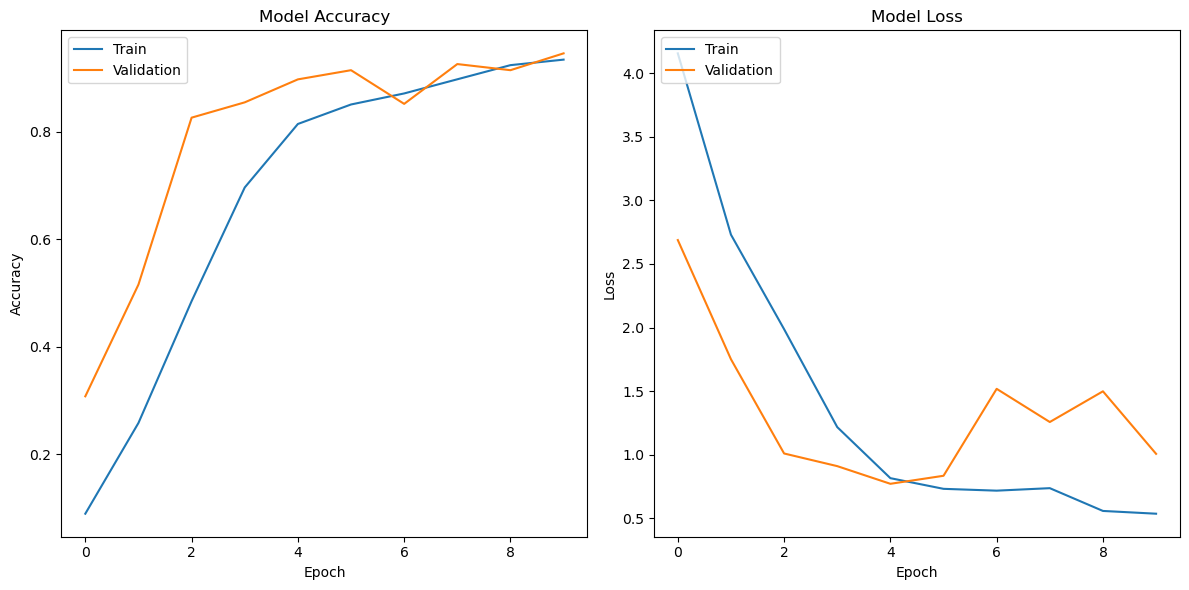

In [12]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [13]:
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


Found 359 images belonging to 36 classes.


12/12 [==============================] - 5s 454ms/step - loss: 0.9856 - accuracy: 0.9471
Test Loss: 0.9855713248252869, Test Accuracy: 0.9470751881599426


In [17]:
model.save("image_recognition_model.keras")